In [1]:
import pandas as pd
data=pd.read_csv("/content/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
print(data.isnull())

     CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0         False   False  False               False                   False
1         False   False  False               False                   False
2         False   False  False               False                   False
3         False   False  False               False                   False
4         False   False  False               False                   False
..          ...     ...    ...                 ...                     ...
195       False   False  False               False                   False
196       False   False  False               False                   False
197       False   False  False               False                   False
198       False   False  False               False                   False
199       False   False  False               False                   False

[200 rows x 5 columns]


In [3]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
print(data==0)

     CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0         False   False  False               False                   False
1         False   False  False               False                   False
2         False   False  False               False                   False
3         False   False  False               False                   False
4         False   False  False               False                   False
..          ...     ...    ...                 ...                     ...
195       False   False  False               False                   False
196       False   False  False               False                   False
197       False   False  False               False                   False
198       False   False  False               False                   False
199       False   False  False               False                   False

[200 rows x 5 columns]


In [7]:
print((data==0).sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [8]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [12]:
import numpy as np

X = data.iloc[:, [3, 4]].values


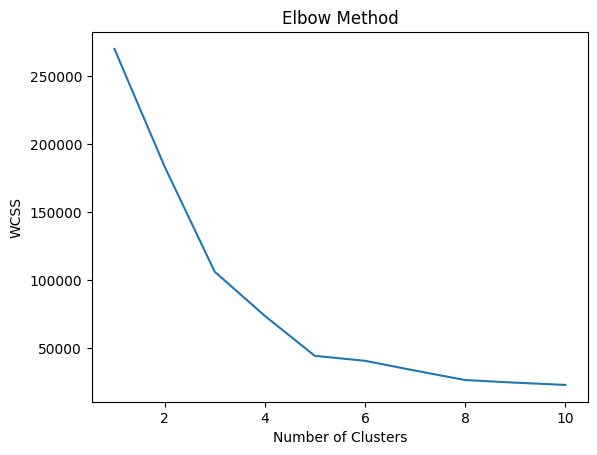

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)


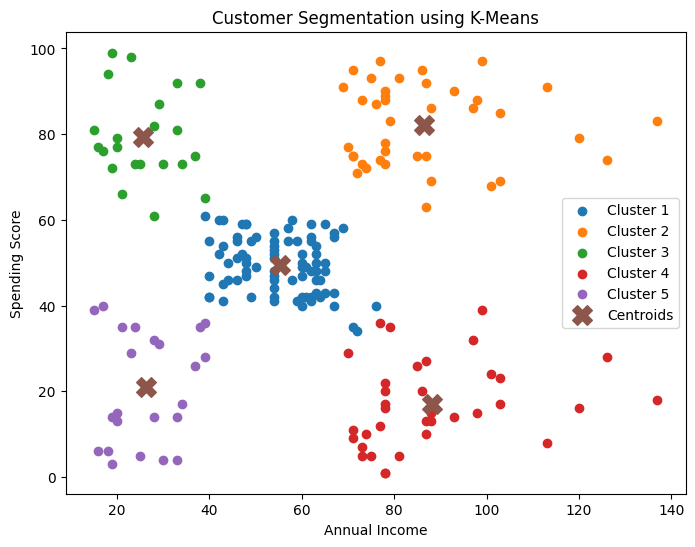

In [14]:
plt.figure(figsize=(8,6))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=200, marker='X', label='Centroids')

plt.title('Customer Segmentation using K-Means')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
